In [11]:
import sys
sys.path.append('/Users/adamdvorak/Ematiq/nba-data-project')
import os

from analysis2.src.data_loader import load_player_ids
from analysis.src.model_stats import combine_player_data


DATA_DIR = '/Users/adamdvorak/Ematiq/nba-data-project/analysis2/database'
RESULTS_FILE = '/Users/adamdvorak/Ematiq/nba-data-project/analysis/results/predicted_vs_actual.csv'
RMSE_FILE = '/Users/adamdvorak/Ematiq/nba-data-project/analysis/results/rmse_values.json'

# Wanted statistic to model
stat = 'Points'

# Ensure the file path is correct
player_ids_file = '/Users/adamdvorak/Ematiq/nba-data-project/analysis/nba_players_w_id.txt'
if not os.path.isfile(player_ids_file):
    raise FileNotFoundError(f"The file {player_ids_file} does not exist.")

player_ids = load_player_ids(player_ids_file)  # {player_id: player_name}
print(f"Loaded {len(player_ids)} player IDs.")

# Fix: Ensure load_player_data correctly handles player_ids
all_data = combine_player_data(player_ids, DATA_DIR, stat)
print(f"Loaded data for {len(all_data)} players.")

Loaded 457 player IDs.


TypeError: combine_player_data() takes 2 positional arguments but 3 were given

In [3]:
import json
from analysis.src.model_stats import predict_player_points

results_dir = '/Users/adamdvorak/Ematiq/nba-data-project/analysis/results'

# Predict the stats for each player
results_df, rmse_data = predict_player_points(all_data)

/Users/adamdvorak/Ematiq/nba-data-project/analysis/src/model_points.py:76: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df.interpolate(method='linear', inplace=True)


Index(['Player ID', 'Date', 'Team', 'Opponent', 'Points',
       'Predicted Points (Linear Model)', 'Predicted Points (Random Forest)'],
      dtype='object')


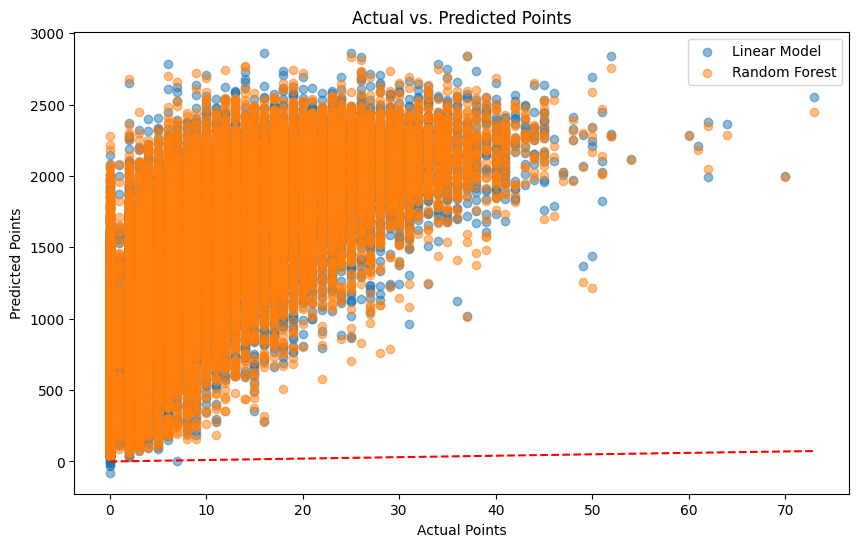

In [9]:
import matplotlib.pyplot as plt


# Ensure the column "Points" exists in results_df
if "Points" not in results_df.columns:
    raise KeyError(f"'Points' column not found in results_df. Available columns: {results_df.columns}")

print(results_df.columns)

def generate_graph(df, stat_to_plot=''):
    """
    Generates and saves scatter plots comparing actual vs. predicted values for various basketball statistics.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the actual and predicted values for the following columns:
        

    The function generates and saves the following plots:
        1. Actual vs. Predicted {stat_to_plot} (Linear Model)

    Each plot is saved as a PNG file in the 'analysis/results/' directory and displayed on the screen.
    """
    
    # Ensure the results directory exists
    os.makedirs('analysis/results', exist_ok=True)

    # Plot actual vs. predicted minutes played
    plt.figure(figsize=(10, 6))
    plt.scatter(df[f'{stat_to_plot}'], df[f'Predicted {stat_to_plot} (Linear Model)'], alpha=0.5, label='Linear Model')
    plt.scatter(df[f'{stat_to_plot}'], df[f'Predicted {stat_to_plot} (Random Forest)'], alpha=0.5, label='Random Forest')
    plt.plot([df[f'{stat_to_plot}'].min(), df[f'{stat_to_plot}'].max()],
             [df[f'{stat_to_plot}'].min(), df[f'{stat_to_plot}'].max()], 'r--')
    plt.xlabel(f'Actual {stat_to_plot}')
    plt.ylabel(f'Predicted {stat_to_plot}')
    plt.title(f'Actual vs. Predicted {stat_to_plot}')
    plt.legend()
    plt.show()

# Generate the scatter plots
generate_graph(results_df, 'Points')